## Column Information
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight - months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

Target Variable: 

default: Default Payment

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier




In [2]:
filepath = 'Credit Card Defaulter Prediction.csv'

data = pd.read_csv(filepath)
data = pd.DataFrame(data)

data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [3]:
# clean data
data.columns = data.columns.str.lower()
data.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default '],
      dtype='object')

In [4]:
descriptives = data.describe().T
descriptives

,count,mean,std,min,25%,50%,75%,max
id,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
pay_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
pay_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
bill_amt1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0


In [5]:
data.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [6]:
data.dtypes

id            int64
limit_bal     int64
sex          object
education    object
marriage     object
age           int64
pay_0         int64
pay_2         int64
pay_3         int64
pay_4         int64
pay_5         int64
pay_6         int64
bill_amt1     int64
bill_amt2     int64
bill_amt3     int64
bill_amt4     int64
bill_amt5     int64
bill_amt6     int64
pay_amt1      int64
pay_amt2      int64
pay_amt3      int64
pay_amt4      int64
pay_amt5      int64
pay_amt6      int64
default      object
dtype: object

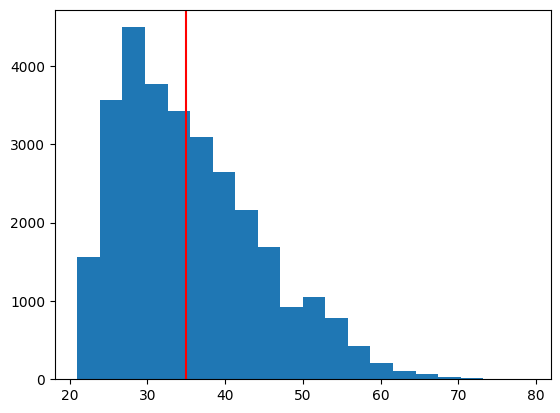

In [7]:
plt.hist(data['age'], bins = 20)
plt.axvline(x = 35, color = "red")
plt.show()

In [8]:
data.duplicated().sum()


np.int64(0)

In [9]:
data.isnull().sum()


id           0
limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_0        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
default      0
dtype: int64

In [10]:
data.shape

(30000, 25)

In [11]:
print(data.columns.tolist())
data.columns = data.columns.str.strip()


['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default ']


In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         30000 non-null  int64 
 1   limit_bal  30000 non-null  int64 
 2   sex        30000 non-null  object
 3   education  30000 non-null  object
 4   marriage   30000 non-null  object
 5   age        30000 non-null  int64 
 6   pay_0      30000 non-null  int64 
 7   pay_2      30000 non-null  int64 
 8   pay_3      30000 non-null  int64 
 9   pay_4      30000 non-null  int64 
 10  pay_5      30000 non-null  int64 
 11  pay_6      30000 non-null  int64 
 12  bill_amt1  30000 non-null  int64 
 13  bill_amt2  30000 non-null  int64 
 14  bill_amt3  30000 non-null  int64 
 15  bill_amt4  30000 non-null  int64 
 16  bill_amt5  30000 non-null  int64 
 17  bill_amt6  30000 non-null  int64 
 18  pay_amt1   30000 non-null  int64 
 19  pay_amt2   30000 non-null  int64 
 20  pay_amt3   30000 non-null  i

In [13]:
data['sex'] = data['sex'].astype('category')
data['education'] = data['education'].astype('category')
data['marriage'] = data['marriage'].astype('category')


In [14]:
data['default'] = data['default'].map({'Y': 1, 'N': 0}).astype('int64')


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         30000 non-null  int64   
 1   limit_bal  30000 non-null  int64   
 2   sex        30000 non-null  category
 3   education  30000 non-null  category
 4   marriage   30000 non-null  category
 5   age        30000 non-null  int64   
 6   pay_0      30000 non-null  int64   
 7   pay_2      30000 non-null  int64   
 8   pay_3      30000 non-null  int64   
 9   pay_4      30000 non-null  int64   
 10  pay_5      30000 non-null  int64   
 11  pay_6      30000 non-null  int64   
 12  bill_amt1  30000 non-null  int64   
 13  bill_amt2  30000 non-null  int64   
 14  bill_amt3  30000 non-null  int64   
 15  bill_amt4  30000 non-null  int64   
 16  bill_amt5  30000 non-null  int64   
 17  bill_amt6  30000 non-null  int64   
 18  pay_amt1   30000 non-null  int64   
 19  pay_amt2   30000 non-null

In [16]:
data.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## EDA

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

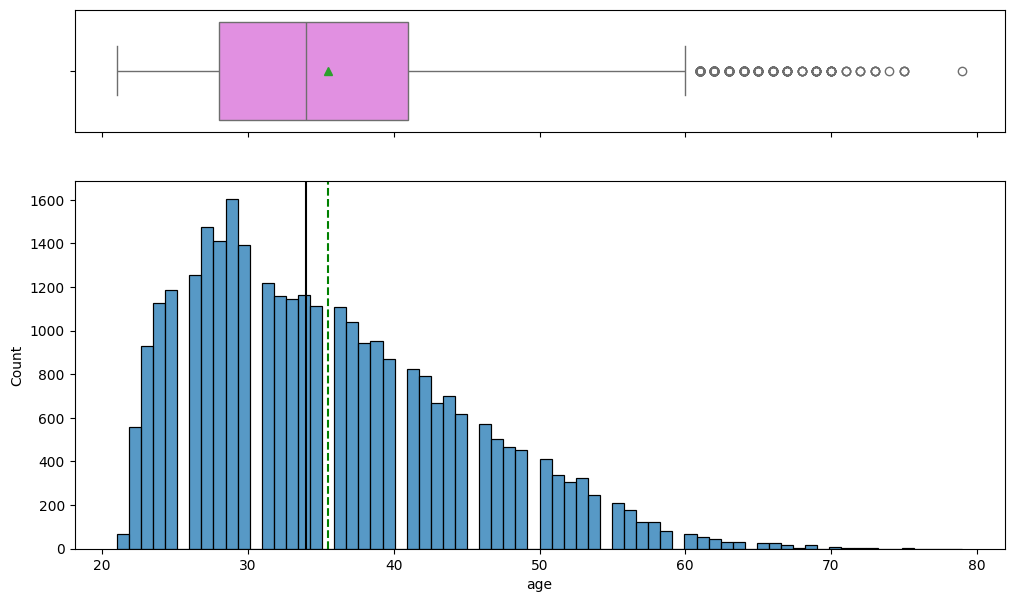

In [18]:
histogram_boxplot(data, "age")


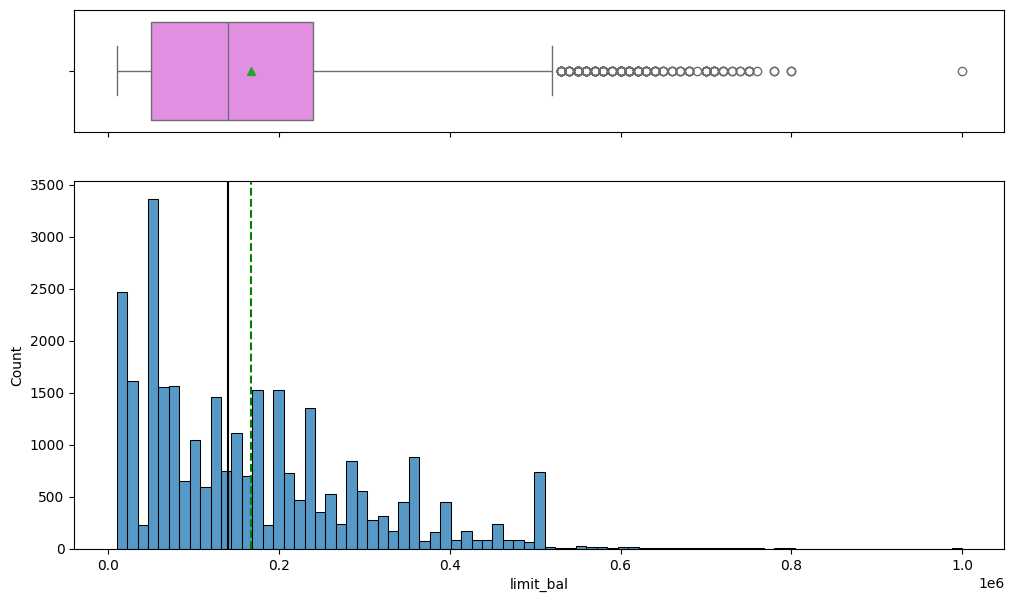

In [19]:
histogram_boxplot(data, "limit_bal")


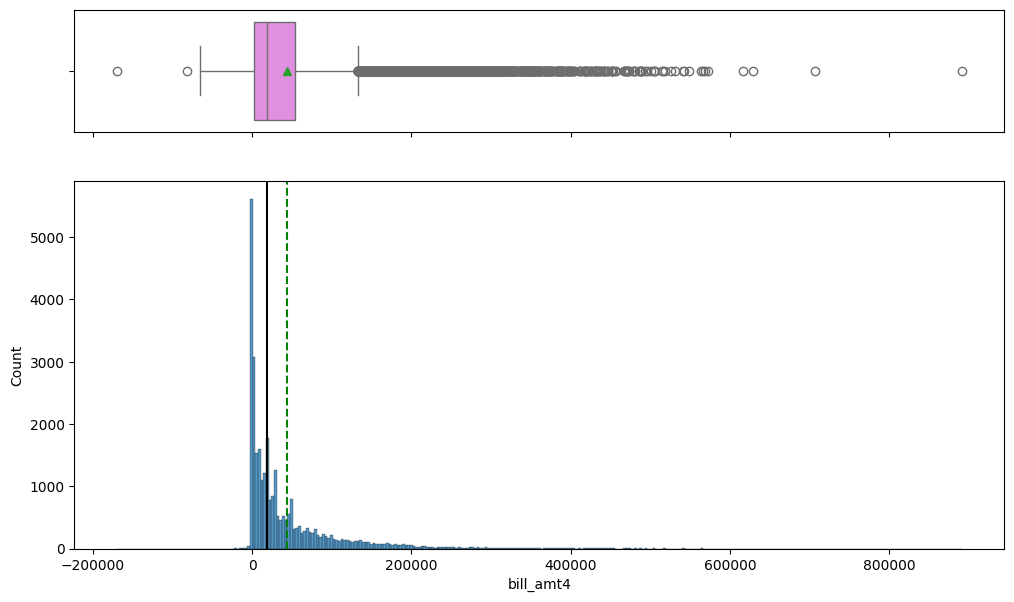

In [20]:
histogram_boxplot(data, "bill_amt4")


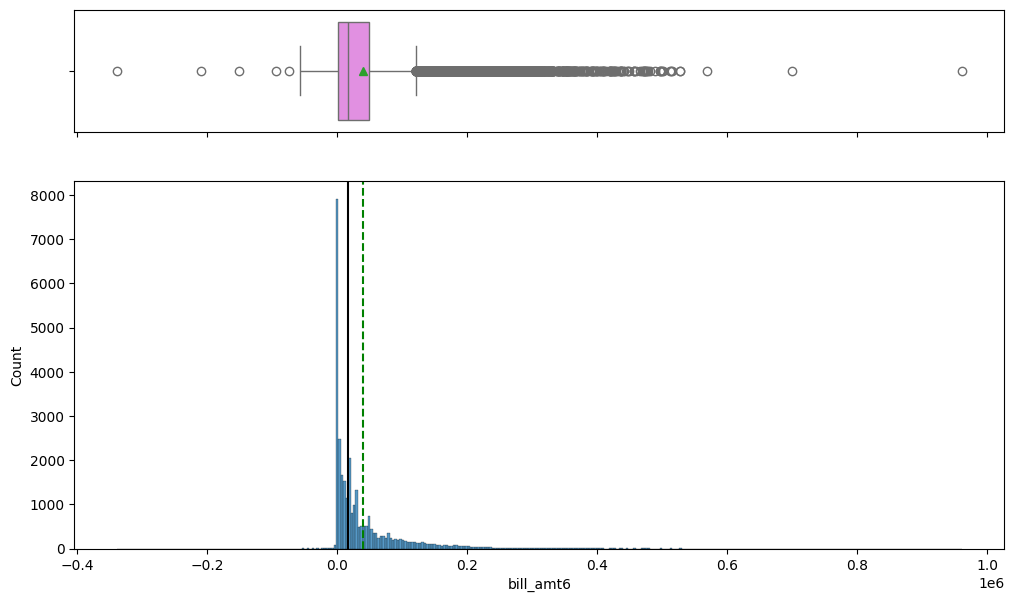

In [21]:
histogram_boxplot(data, "bill_amt6")


In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

/var/folders/wf/wf3j2xk90xd_s2765l06dvqw0000gn/T/ipykernel_2053/2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


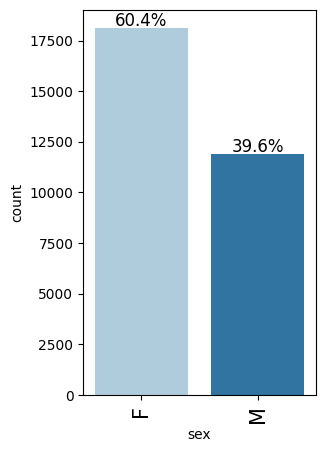

In [23]:
labeled_barplot(data, "sex", perc=True)


/var/folders/wf/wf3j2xk90xd_s2765l06dvqw0000gn/T/ipykernel_2053/2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


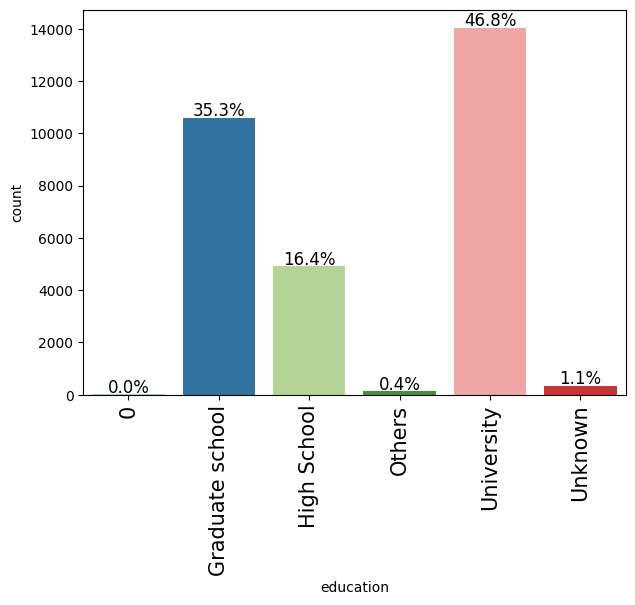

In [24]:
labeled_barplot(data, "education", perc=True)


/var/folders/wf/wf3j2xk90xd_s2765l06dvqw0000gn/T/ipykernel_2053/2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


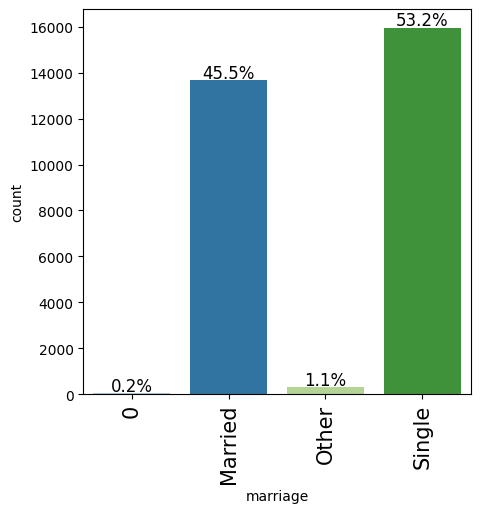

In [25]:
labeled_barplot(data, "marriage", perc=True)


/var/folders/wf/wf3j2xk90xd_s2765l06dvqw0000gn/T/ipykernel_2053/2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


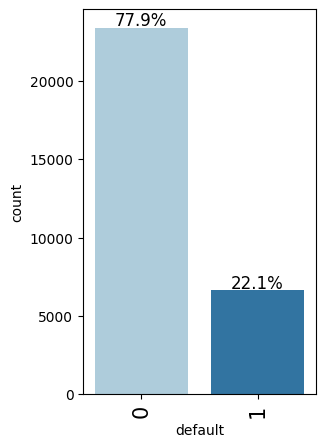

In [26]:
labeled_barplot(data, "default", perc=True)


## Bivariate Analysis

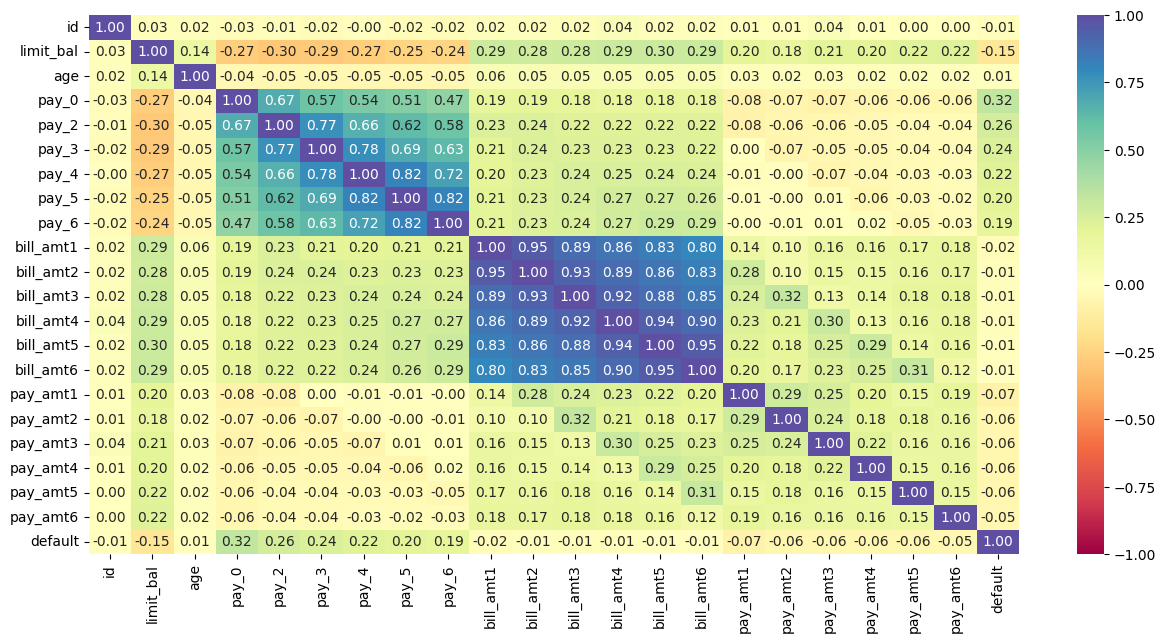

In [27]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Feature Engineering
can be done later

## Data Preparation for Modeling


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [29]:
# Drop columns too granular
data = data.drop(columns=['id'], errors='ignore')

In [30]:
X = data.drop(["default"], axis=1)
y = data["default"]

In [31]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes('category').columns.tolist()

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

X_encoded

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt6,sex_M,education_Graduate school,education_High School,education_Others,education_University,education_Unknown,marriage_Married,marriage_Other,marriage_Single
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,False,False,False,False,True,False,True,False,False
1,120000,26,-1,2,0,0,0,2,2682,1725,...,2000,False,False,False,False,True,False,False,False,True
2,90000,34,0,0,0,0,0,0,29239,14027,...,5000,False,False,False,False,True,False,False,False,True
3,50000,37,0,0,0,0,0,0,46990,48233,...,1000,False,False,False,False,True,False,True,False,False
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,679,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,...,1000,True,False,True,False,False,False,True,False,False
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0,True,False,True,False,False,False,False,False,True
29997,30000,37,4,3,2,-1,0,0,3565,3356,...,3100,True,False,False,False,True,False,False,False,True
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,...,1804,True,False,True,False,False,False,True,False,False


In [32]:
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=99)

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=99)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [34]:
# Create a Decision Tree Classifier instance
#penalize misclassifying class 1
dt_classifier = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=6,           # prevents overfitting
    min_samples_leaf=10,   # ensures leaf nodes have enough samples
    random_state=99
)
dt_classifier.fit(X_train_res, y_train_res)

# Predict
y_pred = dt_classifier.predict(X_test)

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy:.2f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of the Decision Tree Classifier: 0.81

 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      6978
           1       0.59      0.46      0.51      2022

    accuracy                           0.81      9000
   macro avg       0.72      0.68      0.70      9000
weighted avg       0.79      0.81      0.80      9000



In [36]:
feature_importance = pd.DataFrame({
    'feature': X_train_res.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values(by='importance', ascending=False)

print("\nTop important features:")
print(feature_importance)


Top important features:
                      feature  importance
26           marriage_Married    0.325292
2                       pay_0    0.306640
3                       pay_2    0.120171
28            marriage_Single    0.077233
27             marriage_Other    0.031665
14                   pay_amt1    0.019363
4                       pay_3    0.017972
15                   pay_amt2    0.016707
24       education_University    0.015309
6                       pay_5    0.014618
5                       pay_4    0.010625
0                   limit_bal    0.010476
21  education_Graduate school    0.010380
8                   bill_amt1    0.008108
12                  bill_amt5    0.008088
16                   pay_amt3    0.002855
9                   bill_amt2    0.001521
25          education_Unknown    0.001066
22      education_High School    0.000821
10                  bill_amt3    0.000420
1                         age    0.000369
20                      sex_M    0.000301
7        

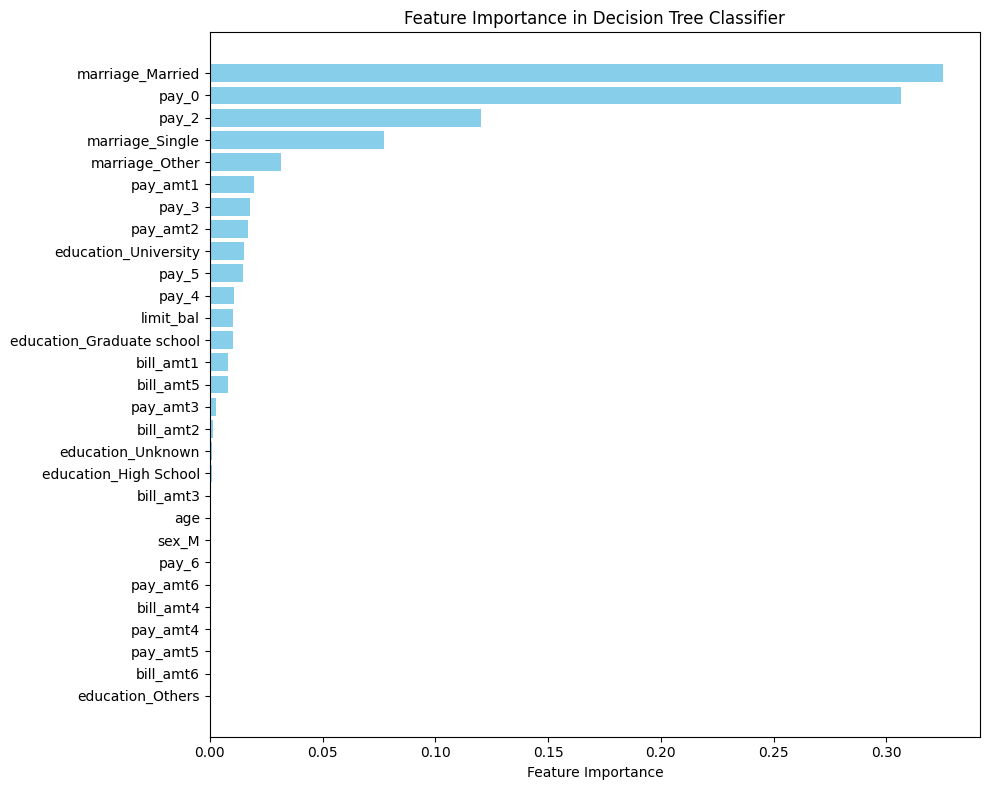

In [37]:
import matplotlib.pyplot as plt

# Assuming feature_importance DataFrame from previous step
feature_importance = feature_importance.sort_values(by='importance', ascending=True)  # for horizontal bar chart

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Classifier')
plt.tight_layout()
plt.show()